In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from preprocess_mitoses import extract_patch, gen_random_translation, get_train_val_splits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
BASE = "data/mitoses"
IMAGES = "mitoses_train_image_data"
LABELS = "mitoses_train_ground_truth"

In [3]:
train, val = get_train_val_splits(0.8)

In [4]:
os.listdir(os.path.join(BASE, IMAGES,))

['49',
 '46',
 '70',
 '64',
 '35',
 '20',
 '32',
 '11',
 '05',
 '68',
 '19',
 '18',
 '34',
 '44',
 '27',
 '22',
 '28',
 '16',
 '69',
 '23',
 '56',
 '01',
 '63',
 '37',
 '71',
 '02',
 '60',
 '08',
 '38',
 '57',
 '03',
 '07',
 '29',
 '30',
 '39',
 '41',
 '43',
 '55',
 '67',
 '15',
 '12',
 '06',
 '50',
 '21',
 '59',
 '45',
 '09',
 '17',
 '52',
 '25',
 '42',
 '66',
 '40',
 '36',
 '31',
 '10',
 '14',
 '04',
 '65',
 '33',
 '26',
 '51',
 '24',
 '61',
 '47',
 '48',
 '73',
 '54',
 '58',
 '53',
 '13',
 '72',
 '62']

In [5]:
os.listdir(os.path.join(BASE, IMAGES, '01'))

['02.tif',
 '06.tif',
 '19.tif',
 '28.tif',
 '29.tif',
 '33.tif',
 '22.tif',
 '27.tif',
 '31.tif',
 '39.tif',
 '04.tif',
 '08.tif',
 '10.tif',
 '14.tif',
 '20.tif',
 '24.tif',
 '09.tif',
 '18.tif',
 '03.tif',
 '13.tif',
 '05.tif',
 '26.tif',
 '30.tif',
 '01.tif',
 '23.tif',
 '38.tif',
 '25.tif',
 '37.tif',
 '15.tif',
 '21.tif',
 '07.tif',
 '17.tif',
 '32.tif',
 '35.tif',
 '12.tif',
 '11.tif',
 '34.tif',
 '16.tif',
 '36.tif']

In [6]:
im = np.array(Image.open(os.path.join(BASE, IMAGES, '01', '01.tif')))

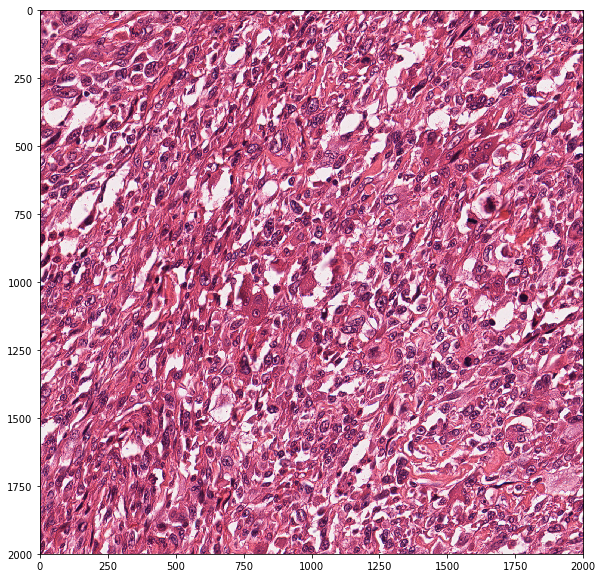

In [136]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(im)

In [137]:
im.shape

(2000, 2000, 3)

In [138]:
path = os.path.join(BASE, LABELS, '01', '01.csv')

# df = pd.read_csv(path, header=None, names=['row', 'col'])
# print(df)
# x, y = df.iloc[2]
# print(x, y)

# no reason to include Pandas just for a simple csv format
coords = np.loadtxt(path, dtype=np.int64, delimiter=',', ndmin=2)

coords

array([[1294, 1573],
       [1059, 1778],
       [ 777, 1590]])

In [139]:
for x, y in coords:
  print(x, y)

1294 1573
1059 1778
777 1590


In [140]:
x, y = coords[-1]
x, y

(777, 1590)

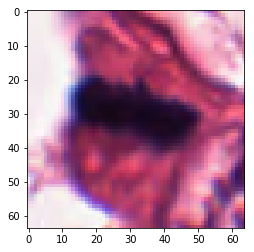

In [155]:
image_size = 64
patch = extract_patch(im, x, y, image_size)
plt.imshow(patch)

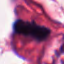

In [156]:
image = Image.fromarray(patch)
image

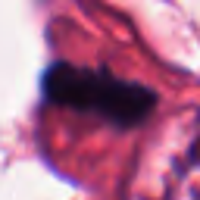

In [162]:
image.resize((200, 200), resample=Image.BICUBIC)

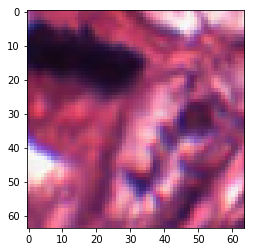

In [153]:
shift = int(image_size/4)
patch = extract_patch(im, x+shift, y+shift, image_size)
plt.imshow(patch)

16


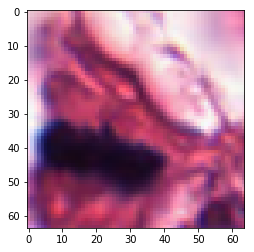

In [149]:
# random shift
max_shift = int(image_size/4)
print(max_shift)
# h, w, c = im.shape
# x_shift = min(max(0, x + np.random.randint(-shift, shift)), h)
# y_shift = min(max(0, y + np.random.randint(-shift, shift)), w)
# patch = extract_patch_with_random_translation(im, x, y, image_size, shift)
x_shift, y_shift = gen_random_translation(im, x, y, max_shift)
patch = extract_patch(im, x_shift, y_shift, image_size)
plt.imshow(patch)

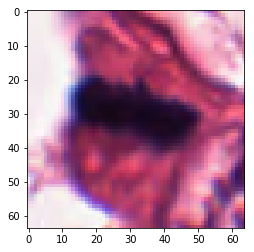

In [143]:
plt.imshow(patch)

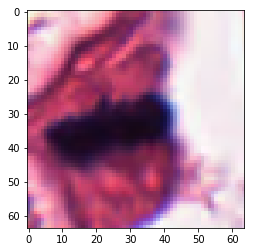

In [37]:
plt.imshow(np.flip(patch, 1))

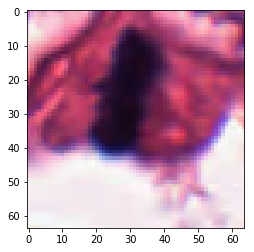

In [17]:
plt.imshow(np.rot90(patch))

In [18]:
# - need to construct dataframes with all mitosis locations
# - then extract those locations plus X number of random translations
#   - folder should be {train or val}/mitosis
#   - filenames should encode lab #, case #, location
# - then extract Y number random normal locations
#   - row/cols should be `size/2` away from the mitosis locations
#     - create mask with mitosis patch locations
#     - for each random location, extract patch from mask
#       and check that the overlap with a mitosis is < THRESHOLD
#   - folder should be {train or val}/normal
#   - filenames should encode lab #, case #, location